In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [5]:
file = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr"
dist_001 = "C:\\Users\\vivek\\Downloads\\amos_001"
dist_004 = "C:\\Users\\vivek\\Downloads\\amos_004"

### Checking just one slice for the two scans

In [3]:
file1 = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr/amos_0001.nii.gz"
img1 = nib.load(file1)
data1 = img1.get_fdata()
plt.imshow(data1[:,:,70], cmap = "viridis")
plt.show()
file2 = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr/amos_0004.nii.gz"
img2 = nib.load(file2)
data2 = img2.get_fdata()
plt.imshow(data2[:,:,70], cmap = "viridis")
plt.show()

FileNotFoundError: No such file or no access: '/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr/amos_0001.nii.gz'

In [54]:
un1 = np.unique(data1)
print(un1)
un2 = np.unique(data2)
print(un2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [55]:
def bbox(img):
    a = np.where(img != 0)
    bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bbox

### Printing each image after using OR and finding the total volume enclosure

0.0


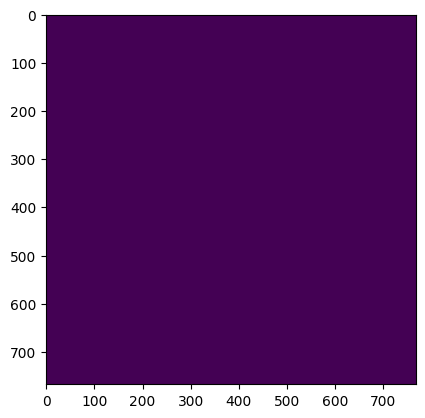

1.0
(466, 624, 229, 363)


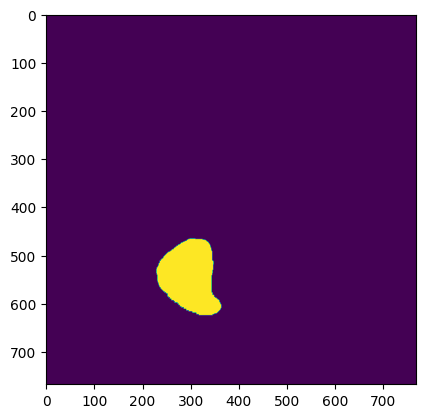

2.0
(238, 350, 265, 384)


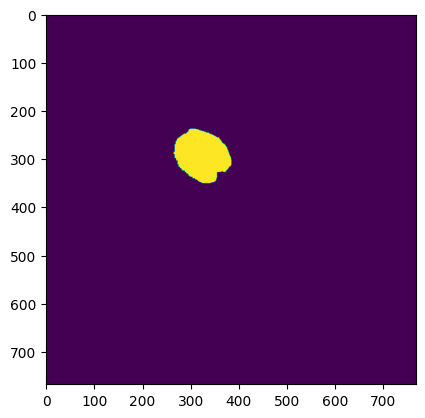

3.0
(452, 572, 252, 374)


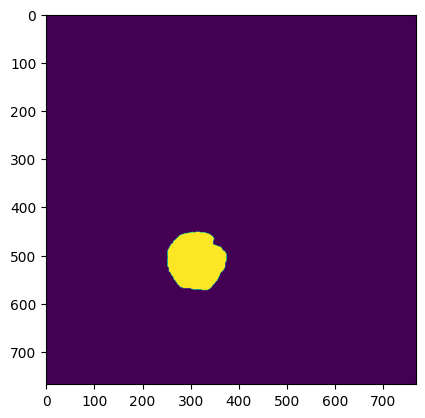

4.0
(277, 360, 387, 507)


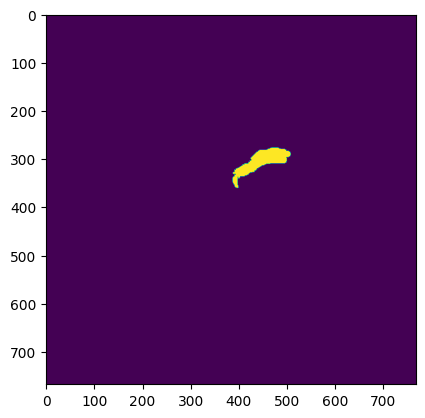

5.0
(399, 452, 332, 399)


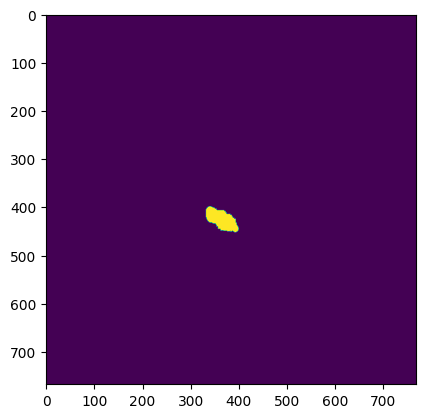

6.0
(175, 566, 246, 529)


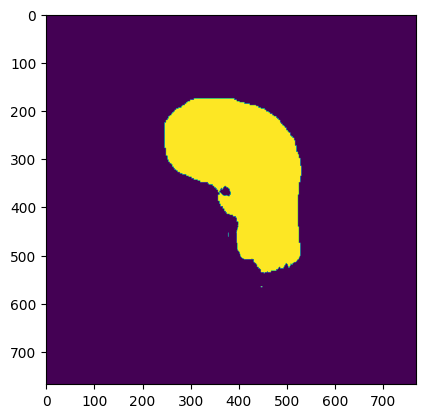

7.0
(348, 593, 285, 524)


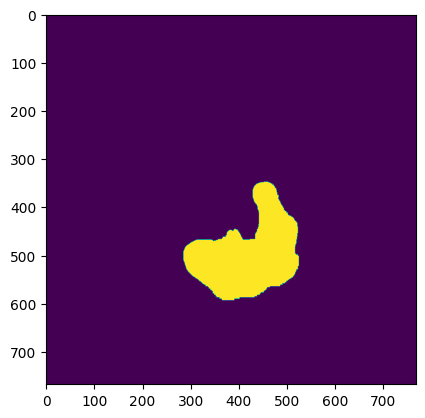

8.0
(386, 476, 287, 416)


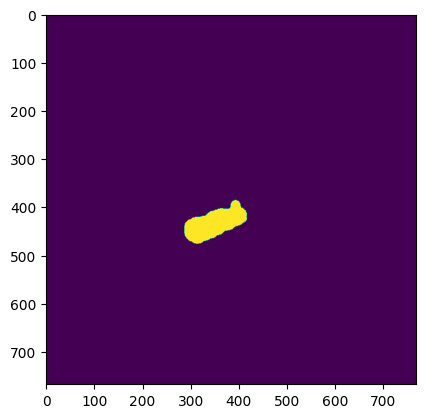

9.0
(330, 418, 352, 409)


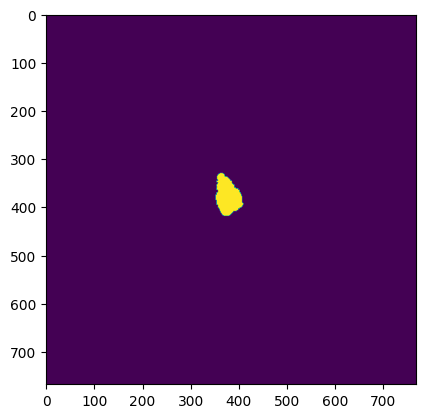

10.0
(327, 551, 340, 454)


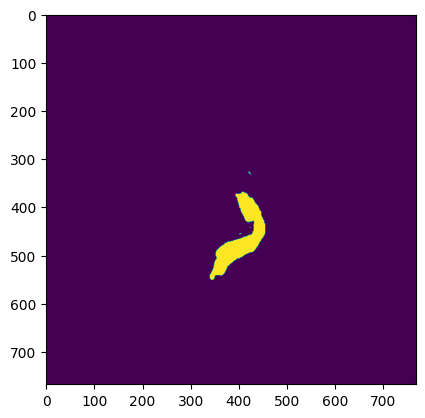

11.0
(320, 361, 297, 354)


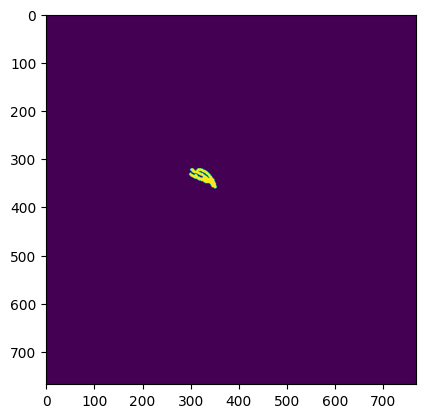

12.0
(453, 501, 312, 379)


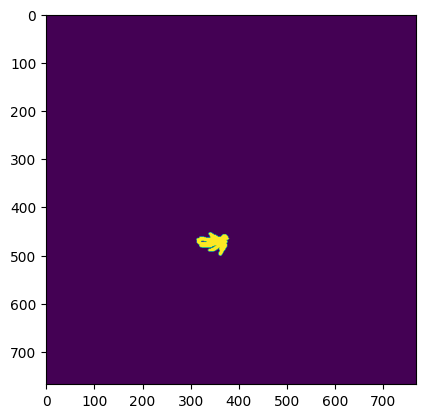

13.0
(321, 488, 371, 453)


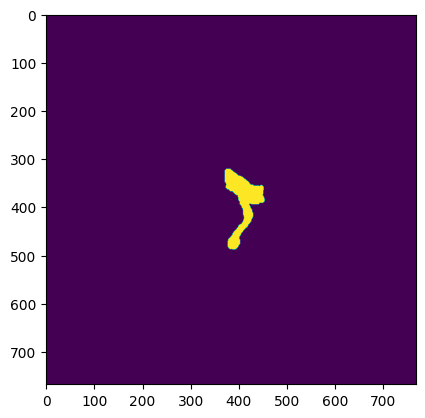

14.0
(311, 439, 302, 436)


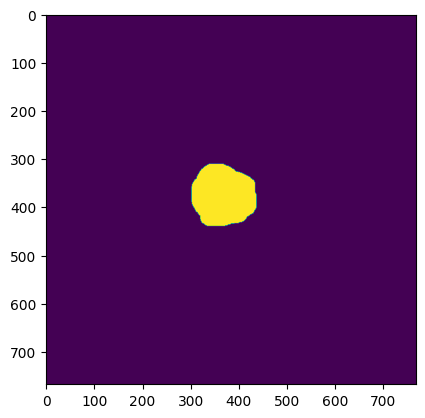

15.0
(336, 427, 294, 375)


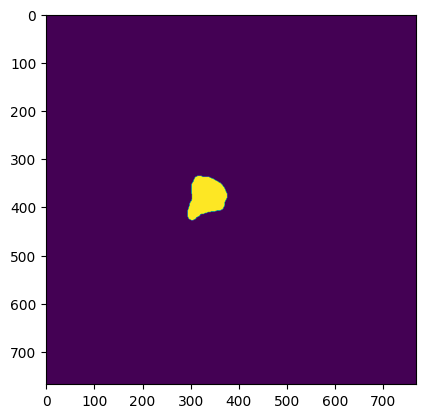

In [56]:
count = []
arr = []
for label in un1:
    x, y, z = np.where(data1==label)
    organ_image = np.zeros_like(data1)
    organ_image[x,y,z] = label
    new_img = np.zeros((768,768))
    for j in range(img1.shape[2]):
        new_img = np.logical_or(organ_image[:,:,j], new_img)
    count.append(organ_image.sum())
    print(label)
    if(label!=un1[0]):
        val = bbox(new_img)
        arr.append(val)
        print(val)
    plt.imshow(new_img)
    plt.show()

0.0


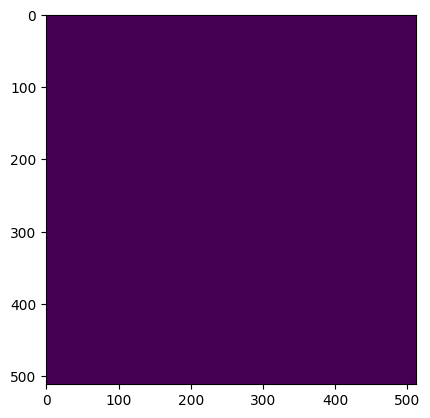

1.0
(318, 411, 178, 252)


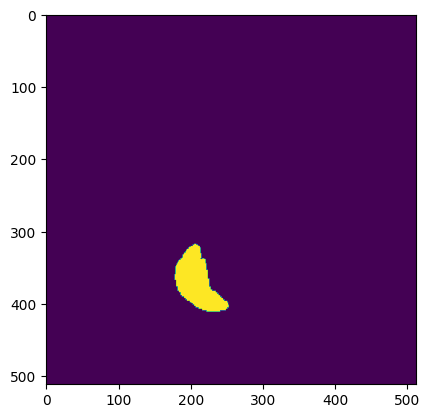

2.0
(159, 264, 180, 246)


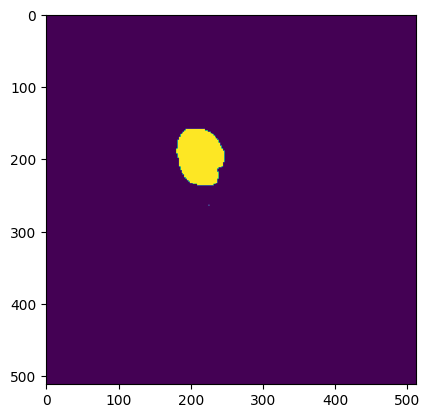

3.0
(299, 380, 186, 246)


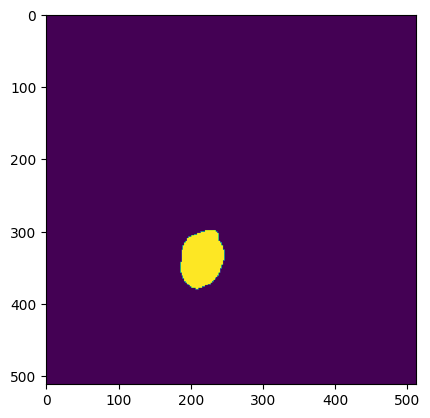

4.0
(150, 204, 257, 297)


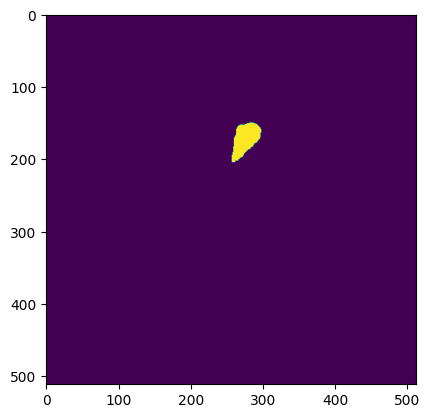

5.0
(274, 307, 223, 259)


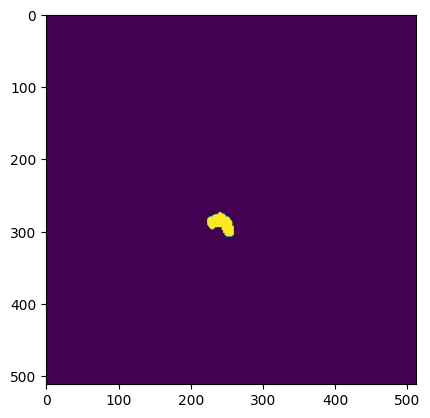

6.0
(109, 334, 165, 330)


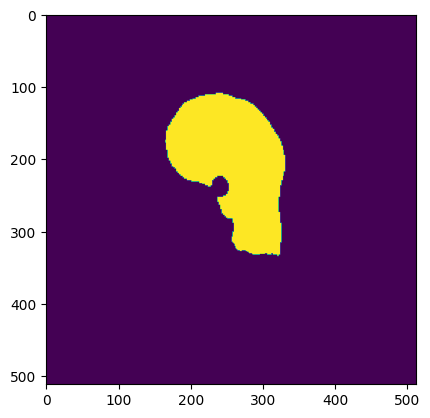

7.0
(251, 378, 214, 327)


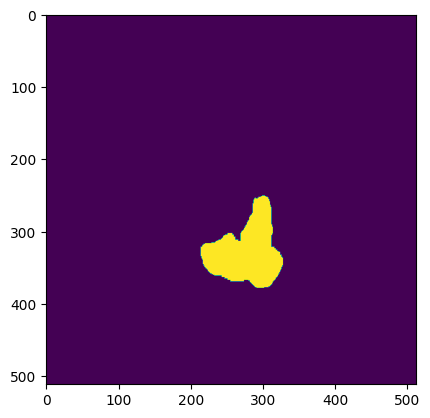

8.0
(251, 317, 201, 281)


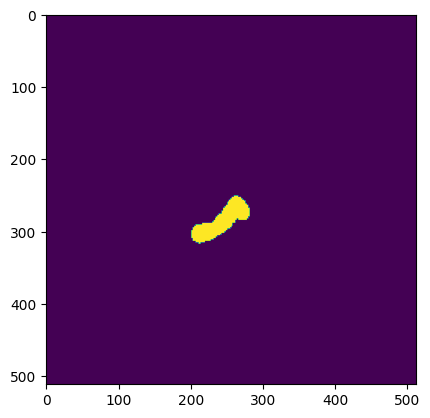

9.0
(216, 263, 228, 275)


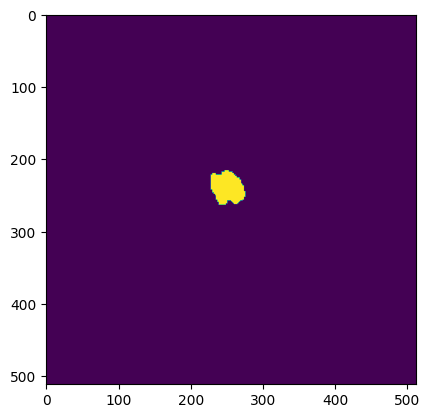

10.0
(216, 369, 214, 295)


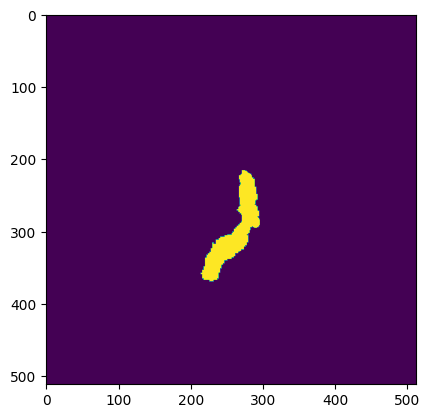

11.0
(215, 240, 205, 240)


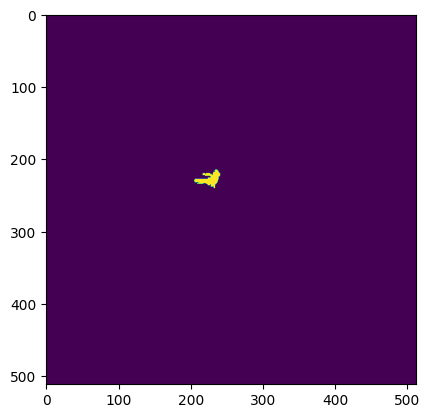

12.0
(293, 325, 232, 262)


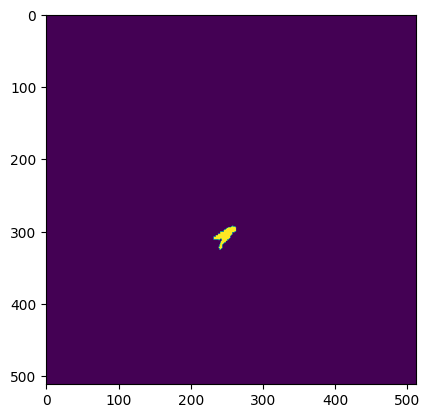

13.0
(206, 286, 252, 303)


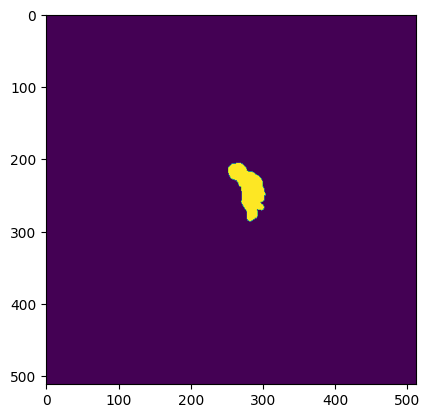

14.0
(214, 300, 226, 299)


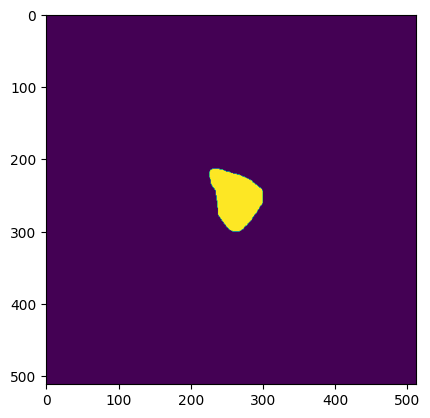

15.0
(248, 321, 188, 253)


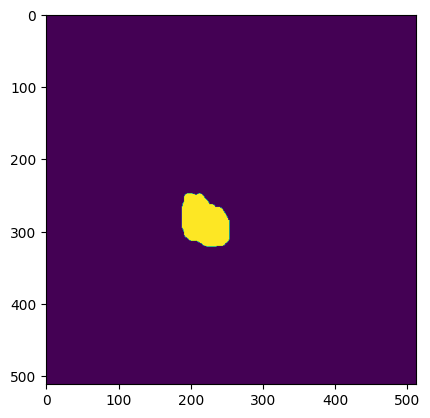

In [58]:
count2 = []
arr2 = []
for label in un2:
    x, y, z = np.where(data2==label)
    organ_image = np.zeros_like(data2)
    organ_image[x,y,z] = label
    new_img = np.zeros((img2.shape[0],img2.shape[1]))
    for j in range(img2.shape[2]):
        new_img = np.logical_or(organ_image[:,:,j], new_img)
    count2.append(organ_image.sum())
    print(label)
    if(label!=un2[0]):
        val = bbox(new_img)
        arr2.append(val)
        print(val)
    plt.imshow(new_img)
    plt.show()

### ymin, ymax, xmin, xmax for each organ

In [59]:
for q in range(len(arr)):
    print(arr[q], q+1)

(466, 624, 229, 363) 1
(238, 350, 265, 384) 2
(452, 572, 252, 374) 3
(277, 360, 387, 507) 4
(399, 452, 332, 399) 5
(175, 566, 246, 529) 6
(348, 593, 285, 524) 7
(386, 476, 287, 416) 8
(330, 418, 352, 409) 9
(327, 551, 340, 454) 10
(320, 361, 297, 354) 11
(453, 501, 312, 379) 12
(321, 488, 371, 453) 13
(311, 439, 302, 436) 14
(336, 427, 294, 375) 15


In [60]:
for q in range(len(arr2)):
    print(arr2[q], q+1)

(318, 411, 178, 252) 1
(159, 264, 180, 246) 2
(299, 380, 186, 246) 3
(150, 204, 257, 297) 4
(274, 307, 223, 259) 5
(109, 334, 165, 330) 6
(251, 378, 214, 327) 7
(251, 317, 201, 281) 8
(216, 263, 228, 275) 9
(216, 369, 214, 295) 10
(215, 240, 205, 240) 11
(293, 325, 232, 262) 12
(206, 286, 252, 303) 13
(214, 300, 226, 299) 14
(248, 321, 188, 253) 15


### Checking for the count of pixels present for each organ

In [61]:
for q in range(len(count)):
    print(count[q], q)

0.0 0
149138.0 1
185496.0 2
307509.0 3
23768.0 4
38540.0 5
5393616.0 6
1972173.0 7
510128.0 8
386730.0 9
231090.0 10
17413.0 11
38904.0 12
289406.0 13
566272.0 14
381105.0 15


In [63]:
count.sort()
count

[0.0,
 17413.0,
 23768.0,
 38540.0,
 38904.0,
 149138.0,
 185496.0,
 231090.0,
 289406.0,
 307509.0,
 381105.0,
 386730.0,
 510128.0,
 566272.0,
 1972173.0,
 5393616.0]

In [62]:
for q in range(len(count2)):
    print(count2[q], q)

0.0 0
23474.0 1
74304.0 2
118086.0 3
24292.0 4
10155.0 5
1559688.0 6
395948.0 7
117640.0 8
196119.0 9
163590.0 10
7425.0 11
11052.0 12
144924.0 13
121044.0 14
269640.0 15


In [64]:
count2.sort()
count2

[0.0,
 7425.0,
 10155.0,
 11052.0,
 23474.0,
 24292.0,
 74304.0,
 117640.0,
 118086.0,
 121044.0,
 144924.0,
 163590.0,
 196119.0,
 269640.0,
 395948.0,
 1559688.0]

### Checking for the mean location of the organ

In [30]:
for i in arr:
    print((i[0]+i[1])/2, (i[2]+i[3])/2)

545.0 296.0
294.0 324.5
512.0 313.0
318.5 447.0
425.5 365.5
370.5 387.5
470.5 404.5
431.0 351.5
374.0 380.5
439.0 397.0
340.5 325.5
477.0 345.5
404.5 412.0
375.0 369.0
381.5 334.5


In [31]:
for i in arr2:
    print((i[0]+i[1])/2, (i[2]+i[3])/2)

364.5 215.0
211.5 213.0
339.5 216.0
177.0 277.0
290.5 241.0
221.5 247.5
314.5 270.5
284.0 241.0
239.5 251.5
292.5 254.5
227.5 222.5
309.0 247.0
246.0 277.5
257.0 262.5
284.5 220.5


### Checking for occurence of organs in which specific slices

In [2]:
array1 = []
array2 = []
for label in un1:
    x, y, z = np.where(data1==label)
    organ_image = np.zeros_like(data1)
    organ_image[x,y,z] = label
    new_img = np.zeros((768,768))
    for j in range(img1.shape[2]):
        if(sum(sum(organ_image[:,:,j]))>0):
            array1.append(j)
            break
    for j in range(img1.shape[2]-1,-1,-1):
        if(sum(sum(organ_image[:,:,j]))>0):
            array2.append(j)
            break

NameError: name 'un1' is not defined

In [34]:
array3 = []
array4 = []
for label in un2:
    x, y, z = np.where(data2==label)
    organ_image = np.zeros_like(data2)
    organ_image[x,y,z] = label
    new_img = np.zeros((768,768))
    for j in range(img2.shape[2]):
        if(sum(sum(organ_image[:,:,j]))>0):
            array3.append(j)
            break
    for j in range(img2.shape[2]-1,-1,-1):
        if(sum(sum(organ_image[:,:,j]))>0):
            array4.append(j)
            break

In [35]:
for a in range(len(array1)):
    print(array1[a], array2[a])

63 82
52 72
50 71
67 70
77 89
52 88
54 88
44 89
44 89
59 73
71 73
67 73
55 69
17 21
10 19


In [36]:
for a in range(len(array1)):
    print(array3[a], array4[a])

58 71
8 62
46 65
56 63
69 76
51 75
54 71
40 77
38 77
47 66
60 66
57 63
42 62
8 11
11 21


### Identifying the intensity values for corresponding organ labels in the original image

file1 = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr/amos_0001.nii.gz"
img1 = nib.load(file1)
data1 = img1.get_fdata()
plt.imshow(data1[:,:,70], cmap = "viridis")
plt.show()
f

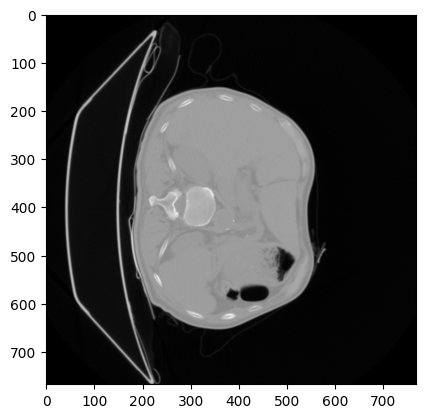

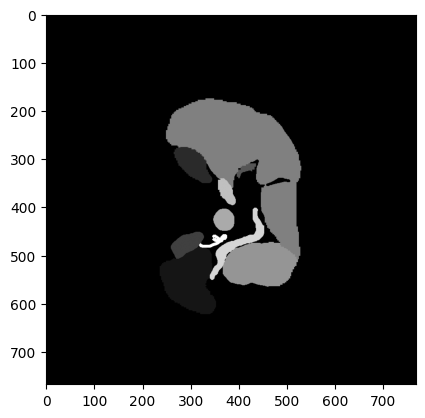

In [48]:
train = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/imagesTr/amos_0001.nii.gz"
train_image = nib.load(train)
train_data = train_image.get_fdata()
plt.imshow(train_data[:,:,70], cmap = "gray")
plt.show()
label = "/home/anshul/Datasets_Analyze/AMOS_Dataset/amos22/labelsTr/amos_0001.nii.gz"
label_image = nib.load(label)
label_data = label_image.get_fdata()
plt.imshow(label_data[:,:,70], cmap = "gray")
plt.show()

In [49]:
un1 = np.unique(train_data)
print(un1)
un2 = np.unique(label_data)
print(un2)

[-1024. -1023. -1022. ...  1368.  1371.  1373.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [97]:
for label in un2:
    x, y, z = np.where(label_data==label)
    organ_image = np.zeros_like(label_data)
    organ_image[x,y,z] = label
    coords = []
    for k in range(organ_image.shape[2]):
        for i in range(organ_image.shape[0]):
            for j in range(organ_image.shape[1]):
                if(organ_image[i,j,k]!=0):
                    coords.append([i,j,k])
    val = 0
    if(len(coords)==0):
        continue
    for i in coords:
        val = val + train_data[i[0],i[1],i[2]]
    val/=len(coords)
    print(val,"--",label)

42.56105083882042 -- 1.0
26.11579764523224 -- 2.0
25.099577573339317 -- 3.0
12.184954560753955 -- 4.0
-51.63349766476388 -- 5.0
50.74529443697883 -- 6.0
-82.2012358956339 -- 7.0
41.93540444751121 -- 8.0
32.78969048173144 -- 9.0
34.721363970747326 -- 10.0
18.212886923562856 -- 11.0
10.692473781616286 -- 12.0
27.834965411912677 -- 13.0
15.305626977848101 -- 14.0
35.0474278742079 -- 15.0


In [70]:
import matplotlib.pyplot as plt
from PIL import Image

Text(0.5, 1.0, 'Masked Image')

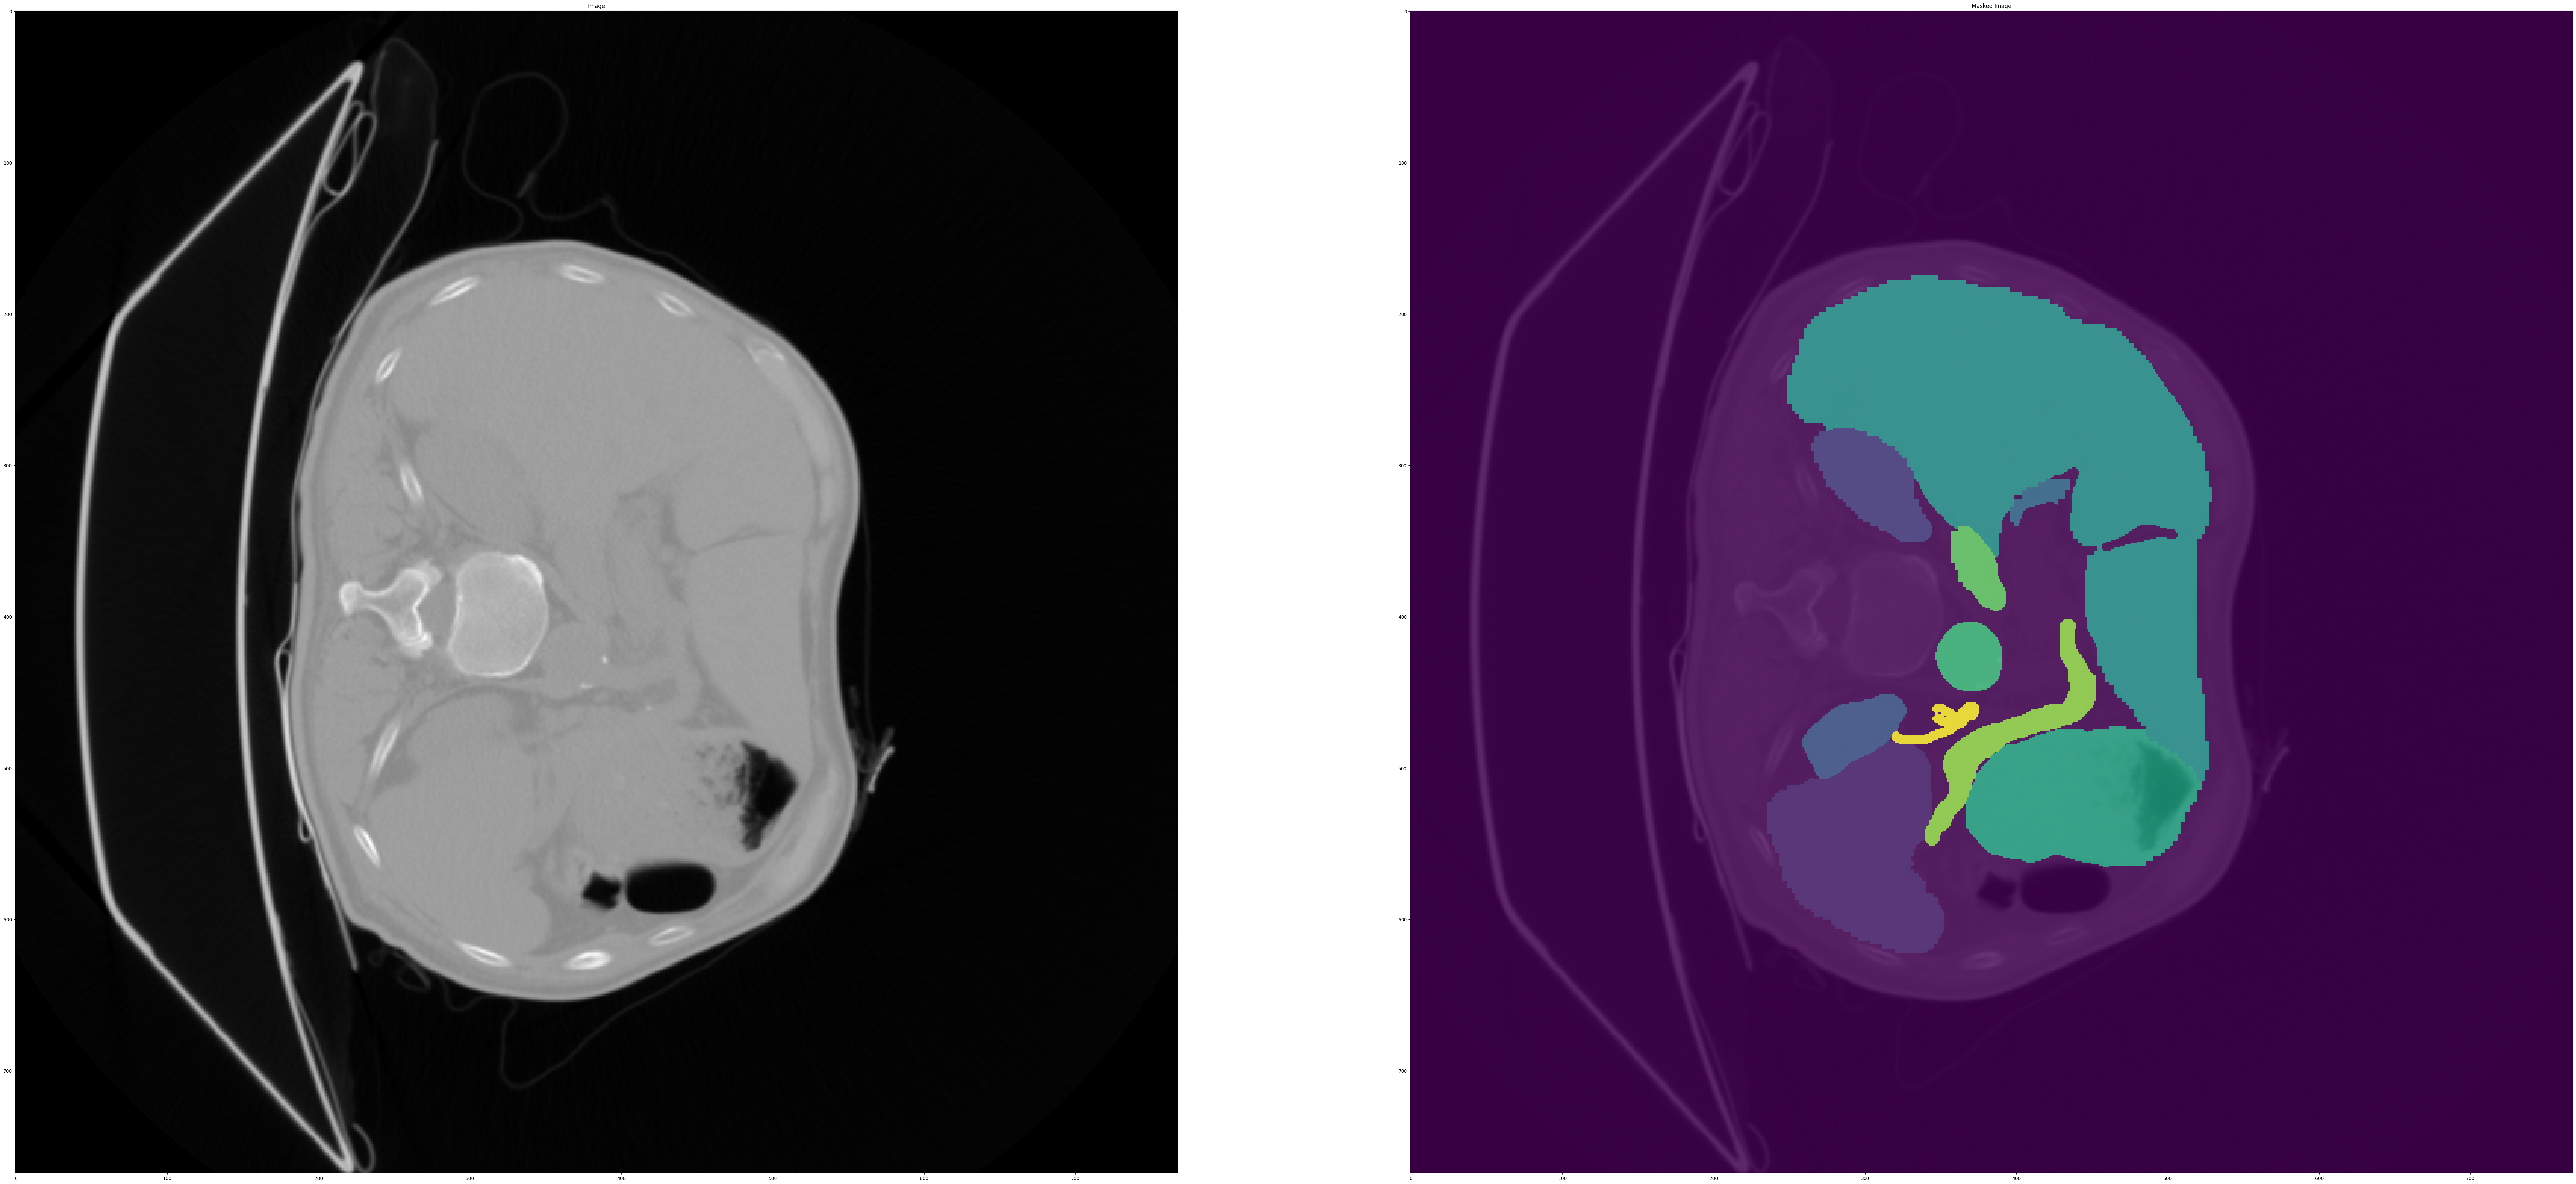

In [93]:
fig,axes = plt.subplots(1,2,figsize=(100,100))

axes[0].imshow(train_data[:,:,70], cmap = "gray")
axes[0].set_title("Image")

axes[1].imshow(train_data[:,:,70], cmap = "gray")
axes[1].imshow(label_data[:,:,70], cmap = "viridis", alpha=0.8)
axes[1].set_title("Masked Image")
